In [59]:
# Import modules 
import math
import numpy as np
from scipy.stats import norm
from scipy.stats import ncx2 
#ncx2 is a class for non-central chi-squared distribution
#ncx2 takes df and nc as shape parameters
import matplotlib.pyplot as plt

In [77]:
# Market, option,share dynamics and information 
# Initializaton of parameters
r     = 0.10  # continously compounded risk free rate
S_0   = 100.0  # initial stock price
sigma = 0.30 # constant volatility of the share price
gamma = 0.75 # the value for the sigma(S_t, t) = sigma*S^(gamma-1) normally defined less than 1 or suing Beta/2 Beta<2
beta  = gamma+1 #adjust between Hsu and course notes formula
T     = 3    # Time until maturity - 3 years
a     = 0  # continously proportional dividend rate

In [78]:
# Call price for a given strike price under CEV model
# CEV Analytics Price Hsu is C(S_0,K,sigma,gamma) = S_0*(1-chi_cdf(2*y;z,2*x)) - K*exp(-r*T)*(1-(1-chi_cdf(2*x;z-2,2*y)))

#1. Using functions in Hsu https://www.cyut.edu.tw/~finance/docs/971021.pdf applying beta
def C_Hsu(T,K):
    
    kappa = 2*(r-a) / (sigma**2*(2-beta)*(np.exp((r-a)*(2-beta)*T)-1)) 
    
    x     = kappa*S_0**(2-beta)*np.exp((r-a)*(2-beta)*T)
    
    y     = kappa*K**(2-beta) 
    
    z    = 2 + 2/(2-beta)
    
    return S_0*np.exp(-a*T)*(1-(ncx2.cdf(2*y,z,2*x)))-K*(1-(1-ncx2.cdf(2*x,z-2,2*y)))*np.exp(-r*T)

C_Hsu(T=3,K=105) #example

24.960667457819554

In [82]:
# Call price for a given strike price under CEV model
# CEV Analytics Price Course Notes is C(S_0,K,sigma,gamma) = S_0*(1-chi_cdf(y;z,x)) - K*exp(-r*T)*(1-(1-chi_cdf(x;z-2,y)))
#2. Using course notes function applying gamma

def C_C(T,K):
    
    kappa = 2*(r-a) / (sigma**2*(1-gamma)*(np.exp((r-a)*(2*(1-gamma))*T)-1)) 
    
    x     = kappa*S_0**(2*(1-gamma))*np.exp((r-a)*(2*(1-gamma))*T)
    
    y     = kappa*K**(2*(1-gamma)) 
    
    z     = 2 + 1/(1-gamma)
    
    return S_0*np.exp(-a*T)*(1-(ncx2.cdf(y,z,x)))-K*(1-(1-ncx2.cdf(x,z-2,y)))*np.exp(-r*T)

C_C(3,105) # example

22.60054513027896

In [84]:
# Creating different strikes to test volatility 
test_strikes = np.linspace(80,120,41)

In [99]:
# Estimating Dupire's Equation by finding estimates for partial derivatives d/dT(C(T,K)), d/dK(C(T,K)) d2/dK2(C(T,K))
# Above are derived under assuptions density density(x,T) = rx linear function as an example

# Applying d/da(f(a,b,c..)) approx f(a+h,b,c..)-f(a,b,c) / 2*h                           for small h 
# Applying d2/da2(f(a,b,c..)) approx f(a+2*h,b,c..)-2*f(a+h,b,c) + f(a,b,c) / h**2         for small h 

#Estimating partial derivatives
delta_t = 0.01 #small change in t 
delta_k = 0.01 #small change in strike
dC_dT   = (C_Hsu(T+delta_t,test_strikes) - C_Hsu(T,test_strikes)) / (2*delta_t)
dC_dK   = (C_Hsu(T,test_strikes + delta_k) - C_Hsu(T,test_strikes)) / (2*delta_k)
d2C_dK2 = (C_Hsu(T,test_strikes + 2*delta_k) - 2*C_Hsu(T,test_strikes+delta_k) + C_Hsu(T,test_strikes)) / delta_k**2

In [100]:
# Estimating volatility #Dupire
vol_estimates = (np.sqrt(2)/test_strikes)*np.sqrt((dC_dT + r*test_strikes*dC_dK)/d2C_dK2)

# Volatility closed form based on sigma*S_t**(gamma-1)
vol_estimates_closed_form = sigma*test_strikes**(gamma-1)

Text(0, 0.5, 'Volatility')

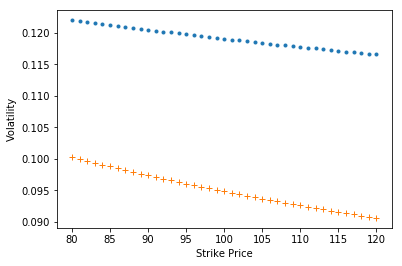

In [101]:
# Plotting closed form with Dupire Equations
plt.plot(test_strikes, vol_estimates, '.')
plt.plot(test_strikes, vol_estimates_closed_form, '+')
plt.xlabel("Strike Price")
plt.ylabel("Volatility")
